1. Cities in Sweden.

In [164]:
# A. Print out all the cities
import pandas as pd

df = pd.DataFrame({'Kommun': ['Malmö', 'Stockholm', 'Uppsala', 'Göteborg'],
      'Population': [347949, 975551, 233839, 583056]})
print(df['Kommun'])

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object


In [165]:
# B. Select only the row which contains Göteborg
df.loc[df['Kommun'] == 'Göteborg']

,Kommun,Population
3,Göteborg,583056


In [166]:
# C. Sort the cities by population from largest to smallest
sorted_df = df.sort_values(by=['Population'], ascending=False).reset_index(drop=True)
sorted_df

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949
3,Uppsala,233839


In [167]:
# D. Filter out the three largest cities
sorted_df.head(3)

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


In [168]:
# E. Add new column in sorted DataFrame named: Population(%)
sorted_df['Population(%)'] = (sorted_df['Population']/10379295*100).round(1)
sorted_df

,Kommun,Population,Population(%)
0,Stockholm,975551,9.4
1,Göteborg,583056,5.6
2,Malmö,347949,3.4
3,Uppsala,233839,2.3


2. Cities in Sweden - real dataset

In [169]:
# A, B. Read in and clean data
import pandas as pd

columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']
df = pd.read_excel('../Exercise/komtopp50_2020.xlsx', header=[6],names=columns, sheet_name='Totalt')
df.head()

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [170]:
# C. Sort the cities by population from largest to smallest
df = df.sort_values(by=['Folkmängd 2020'], ascending=False).reset_index(drop=True)
l_cities = df.head()
l_cities

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822


In [171]:
# D. Filter out the five smallest cities
s_cities = df.tail()
s_cities

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
285,286,286,Åsele,2805,2794,0.393701
286,287,287,Arjeplog,2718,2785,-2.405745
287,288,288,Dorotea,2498,2551,-2.077617
288,289,289,Sorsele,2442,2489,-1.888309
289,290,290,Bjurholm,2387,2408,-0.872093


In [172]:
# E. Use the DataFrame to calculate Sweden's population in 2019 and 2020
print(f'Populationen i Sverige 2020: {df['Folkmängd 2020'].sum()}')
print(f'Populationen i Sverige 2019: {df['Folkmängd 2019'].sum()}')

Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589


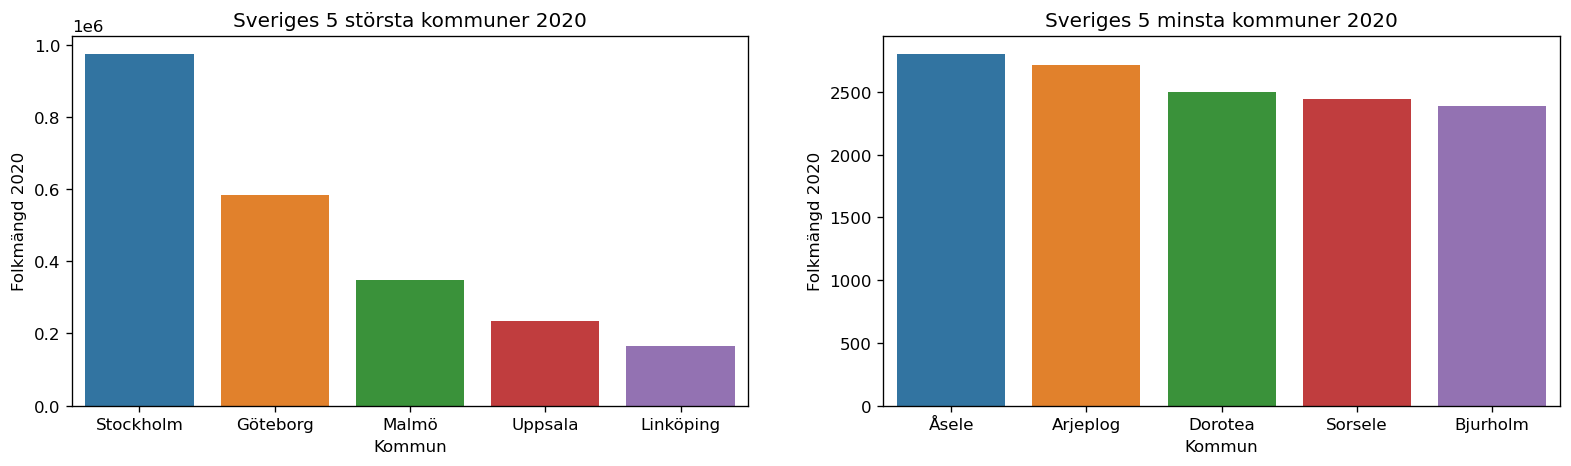

In [173]:
# F. Plot a bar chart for the five largest cities and the five smallest cities
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, dpi=120, figsize=(16,4))
titles = ['Sveriges 5 största kommuner 2020', 'Sveriges 5 minsta kommuner 2020']
data_frames = [l_cities, s_cities]
x_column = ['Kommun', 'Kommun']

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x=x_column[i], y='Folkmängd 2020', ax = axes[i], hue='Kommun')
    axes[i].set(title=title)
plt.show()

3. Cities in Sweden - gender

In [174]:
import pandas as pd

# A. Clean data
columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring']
df_m = pd.read_excel('../Exercise/komtopp50_2020.xlsx', header=[6],names=columns, sheet_name='Män')
df_k = pd.read_excel('../Exercise/komtopp50_2020.xlsx', header=[6],names=columns, sheet_name='Kvinnor')
df_m['Kön'] = 'man'
df_k['Kön'] = 'kvinna'

In [175]:
# B. Merge the male and female DataFrames
gender_df = pd.concat([df_k,df_m]).drop(['Rang 2020', 'Rang 2019'],axis=1)
gender_df

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,Ale,15612,15348,1.720094,kvinna
1,Alingsås,20900,20774,0.606527,kvinna
2,Alvesta,9857,9795,0.632976,kvinna
3,Aneby,3318,3350,-0.955224,kvinna
4,Arboga,6945,6973,-0.401549,kvinna
...,...,...,...,...,...
285,Österåker,23647,23132,2.226353,man
286,Östhammar,11405,11447,-0.366908,man
287,Östra Göinge,7747,7745,0.025823,man
288,Överkalix,1730,1737,-0.402994,man


In [176]:
# C. Extract and change column name from the total DataFrame

columns = ['Kommun', 'Total Pop 2020', 'Total Pop 2019', 'Total förändring']
new_df = pd.read_excel('../Exercise/komtopp50_2020.xlsx', header=[6],names=columns, sheet_name='Totalt').reset_index(drop=True)
new_df.head()

,Kommun,Total Pop 2020,Total Pop 2019,Total förändring
0,Ale,31868,31402,1.483982
1,Alingsås,41602,41420,0.439401
2,Alvesta,20224,20134,0.447005
3,Aneby,6821,6848,-0.394276
4,Arboga,14039,14087,-0.340740


In [177]:
# D. Merge C-data with B-data
merged_df = pd.merge(gender_df,new_df).set_index('Kommun').sort_values(by='Total Pop 2020',ascending=False)
merged_df.head()

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total förändring
Kommun,,,,,,,
Stockholm,492569,491853,0.145572,kvinna,975551,974073,0.151734
Stockholm,482982,482220,0.158019,man,975551,974073,0.151734
Göteborg,290551,288973,0.546072,kvinna,583056,579281,0.651670
Göteborg,292505,290308,0.756782,man,583056,579281,0.651670
Malmö,175411,173543,1.07639,kvinna,347949,344166,1.099179


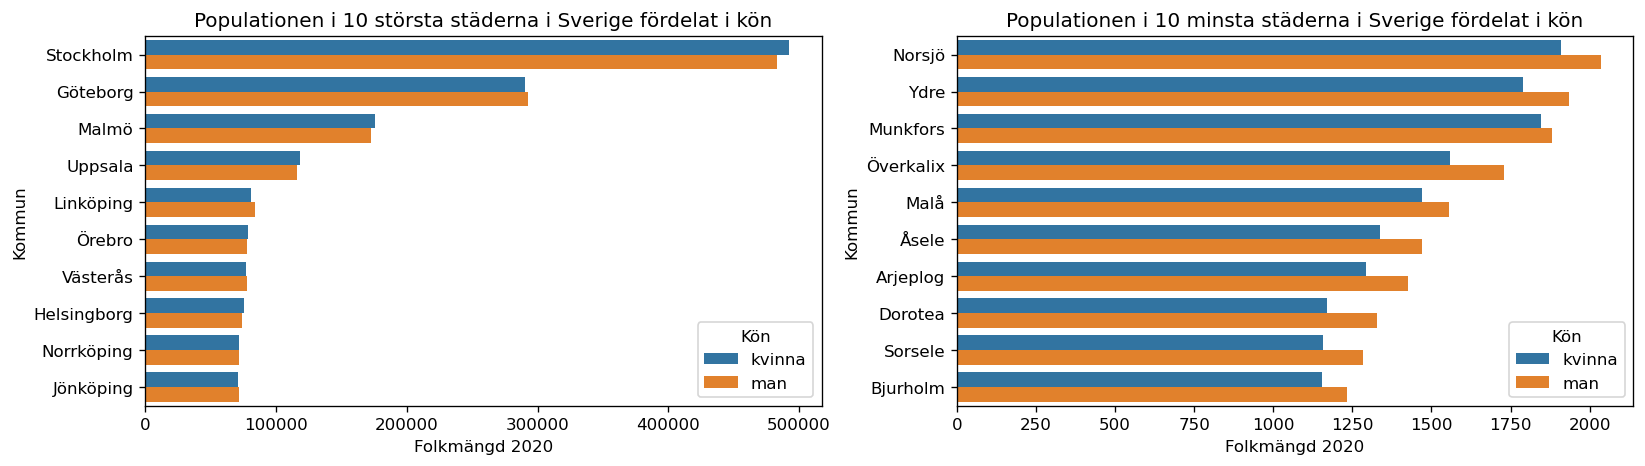

In [187]:
# E. Barplots showing the gender populations of Swedens 10 largest and 10 smallest cities
ten_l_cities = merged_df.nlargest(20,'Total Pop 2020')
ten_s_cities = merged_df.nsmallest(20, 'Total Pop 2020').sort_values(by='Total Pop 2020',ascending=False)

fig, axes = plt.subplots(1,2, dpi=120, figsize=(16,4))
titles = ['Populationen i 10 största städerna i Sverige fördelat i kön', 'Populationen i 10 minsta städerna i Sverige fördelat i kön']
data_frames = [ten_l_cities, ten_s_cities]
x_column = ['Folkmängd 2020', 'Folkmängd 2020']

for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data = data, x=x_column[i], y='Kommun', ax = axes[i], hue='Kön',orient='h')
    axes[i].set(title=title)
plt.show()